In [ ]:
!pip install matplotlib
! pip install numpy

In [27]:
import json

# Open the JSON file
with open('output.json', 'r') as json_file:
    # Load the JSON data
    data = json.load(json_file)

alephs = []
expectedindicator = []



# Access the data
for element in data:
    expectedindicator.append(element['value1'])
    alephs.append(element['value2'])







In [28]:
print(alephs)
print(expectedindicator)

[0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
[0.19999999999999965, 0.4000000000000001, 0.6000000000000012, 0.8000000000000003, 1.0000000000000007, 1.1999999999999997, 1.4, 1.5999999999999999, 1.7999999999999994, 1.8027190660252814]


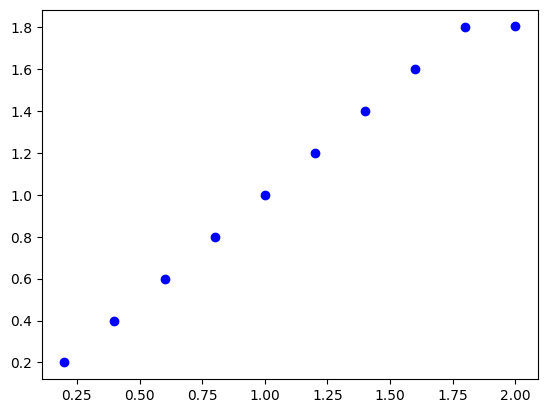

In [37]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.scatter(alephs, expectedindicator, label='aleph vs. expected indicator', color='blue')
plt.savefig('example_plot.png')



In [ ]:
"""somehow visualize these plots depending on maxLambda. Possibly in grids so we can see 
where there is a somehow linear relationship and where not """

